# Define variables to retrieve

In [1]:

variables = {
    'Q2M': 'Global mean 2m Specific Humidity (Q2M)', 
    'FSH': 'Sensible Heat Flux (FSH)',
    'EFLX_LH_TOT': 'Latent Heat Flux (EFLX_LH_TOT)',
    'FSA': 'Shortwave Radiation (FSA)',
    'U10': 'Wind Speed (U10)',
}




In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import os

df_no_hw = pd.read_feather('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/investigate_FSH_no_hw.feather')
df_hw = pd.read_feather('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/investigate_FSH_hw.feather')
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61524648 entries, 9307152 to 59963591
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   time             datetime64[ns]
 1   lat              float32       
 2   lon              float32       
 3   Q2M              float32       
 4   FSH              float32       
 5   EFLX_LH_TOT      float32       
 6   FSA              float32       
 7   U10              float32       
 8   hour             int32         
 9   month            int32         
 10  year             int32         
 11  local_time       datetime64[ns]
 12  local_hour       int32         
 13  location_ID      int64         
 14  time_diff        float64       
 15  new_event        bool          
 16  event_ID         int64         
 17  global_event_ID  object        
dtypes: bool(1), datetime64[ns](2), float32(7), float64(1), int32(4), int64(2), object(1)
memory usage: 5.8+ GB


In [3]:
df_no_hw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208826808 entries, 0 to 208826807
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   time         datetime64[ns]
 1   lat          float32       
 2   lon          float32       
 3   Q2M          float32       
 4   FSH          float32       
 5   EFLX_LH_TOT  float32       
 6   FSA          float32       
 7   U10          float32       
 8   hour         int32         
 9   month        int32         
 10  year         int32         
 11  local_time   datetime64[ns]
 12  local_hour   int32         
 13  location_ID  int64         
dtypes: datetime64[ns](2), float32(7), int32(4), int64(1)
memory usage: 13.2 GB


In [4]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61524648 entries, 9307152 to 59963591
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   time             datetime64[ns]
 1   lat              float32       
 2   lon              float32       
 3   Q2M              float32       
 4   FSH              float32       
 5   EFLX_LH_TOT      float32       
 6   FSA              float32       
 7   U10              float32       
 8   hour             int32         
 9   month            int32         
 10  year             int32         
 11  local_time       datetime64[ns]
 12  local_hour       int32         
 13  location_ID      int64         
 14  time_diff        float64       
 15  new_event        bool          
 16  event_ID         int64         
 17  global_event_ID  object        
dtypes: bool(1), datetime64[ns](2), float32(7), float64(1), int32(4), int64(2), object(1)
memory usage: 5.8+ GB


# create daytime and nighttime dfs

In [5]:
# Define day and night masks
daytime_hw = df_hw[df_hw['local_hour'].between(8, 16)]
nighttime_hw = df_hw[(df_hw['local_hour'].between(20, 24) | df_hw['local_hour'].between(0, 4))]

# Define day and night masks
daytime_no_hw = df_no_hw[df_no_hw['local_hour'].between(8, 16)]
nighttime_no_hw =df_no_hw[(df_no_hw['local_hour'].between(20, 24) | df_no_hw['local_hour'].between(0, 4))]

In [6]:
print(daytime_hw.info())
print(nighttime_hw.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23071743 entries, 9309258 to 59953041
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   time             datetime64[ns]
 1   lat              float32       
 2   lon              float32       
 3   Q2M              float32       
 4   FSH              float32       
 5   EFLX_LH_TOT      float32       
 6   FSA              float32       
 7   U10              float32       
 8   hour             int32         
 9   month            int32         
 10  year             int32         
 11  local_time       datetime64[ns]
 12  local_hour       int32         
 13  location_ID      int64         
 14  time_diff        float64       
 15  new_event        bool          
 16  event_ID         int64         
 17  global_event_ID  object        
dtypes: bool(1), datetime64[ns](2), float32(7), float64(1), int32(4), int64(2), object(1)
memory usage: 2.2+ GB
None
<class 'pandas.core.frame.D

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.colors import TwoSlopeNorm

def normalize_longitude(lons):
    """
    Normalize longitudes to be within the range [-180, 180].
    """
    normalized_lons = np.where(lons > 180, lons - 360, lons)
    return normalized_lons

def draw_map_subplot(ax, title, data, variable):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        ax.set_title(title + " - No Data Available")
        return

    m = Basemap(projection='cyl', lon_0=0, ax=ax,
                fix_aspect=False,
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines(color='0.15', linewidth=0.5, zorder=3)
    m.drawcountries(linewidth=0.1)
    m.fillcontinents(color='white', lake_color='lightcyan')
    m.drawmapboundary(fill_color='lightcyan')
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 60.), labels=[0, 0, 0, 1], fontsize=10)

    normalized_lons = normalize_longitude(data['lon'].values)
    x, y = m(normalized_lons, data['lat'].values)

    vmin, vmax = data[variable].min(), data[variable].max()
    vcenter = 0
    # set vcenter to average fo vmin and vmax if both have the same sign
    if vmin * vmax > 0:
        vcenter = (vmin + vmax) / 2 
    
    # Create a diverging colormap centered at zero
    cmap = plt.get_cmap('coolwarm')
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    
    sc = m.scatter(x, y, c=data[variable], cmap=cmap, norm=norm, marker='o', edgecolor='none', s=10, alpha=0.75)
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, extend='both')
    cbar.set_label(variable)
    ax.set_title(title)

# Example usage:
# fig, ax = plt.subplots(figsize=(12, 6))
# draw_map_subplot(ax, "Your Title", your_dataframe, 'your_variable')
# plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


def plot_hw_no_diff(df_hw, df_no_hw, title:str, variable:str):
    # Compute the mean of the specified variable for both dataframes
    df_hw_mean = df_hw.groupby(['lat', 'lon'])[variable].mean().reset_index()
    df_no_hw_mean = df_no_hw.groupby(['lat', 'lon'])[variable].mean().reset_index()
    
    # Merge the two dataframes on latitude and longitude
    df_diff = pd.merge(df_hw_mean, df_no_hw_mean, on=['lat', 'lon'], suffixes=('_hw', '_no_hw'))
    
    # Compute the difference between the two variables
    df_diff['difference'] = df_diff[f'{variable}_hw'] - df_diff[f'{variable}_no_hw']
    
    # Plot the map using the draw_map_subplot function
    fig, ax = plt.subplots(figsize=(12, 6))
    # fig, axs = plt.subplots(figsize=(10, 6), dpi=300)  # Correct subplot structure
    draw_map_subplot(ax, title, df_diff, 'difference')
    plt.show()

# Example usage:
# plot_hw_no_diff(df_hw, df_no_hw, 'Title of the Map', 'variable_name')


# Day time and Night time plots

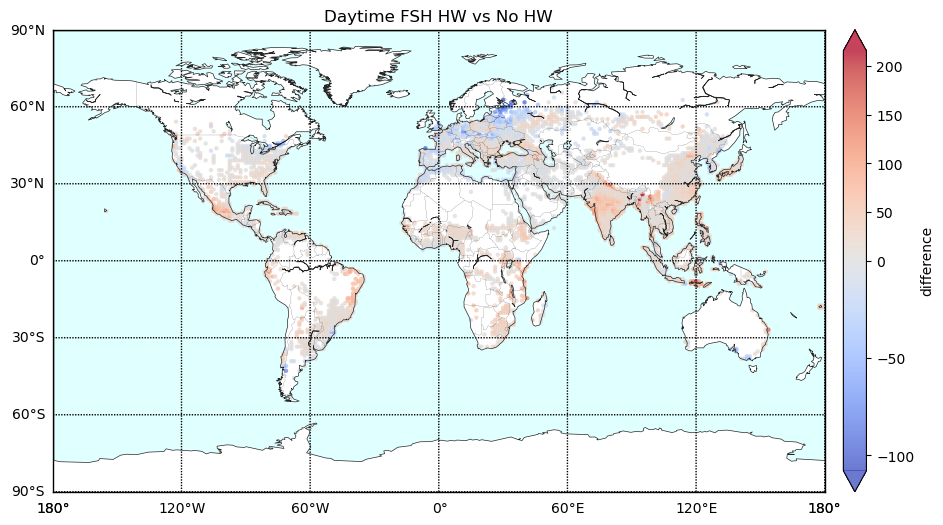

In [9]:
plot_hw_no_diff(daytime_hw, daytime_no_hw, 'Daytime FSH HW vs No HW', 'FSH')

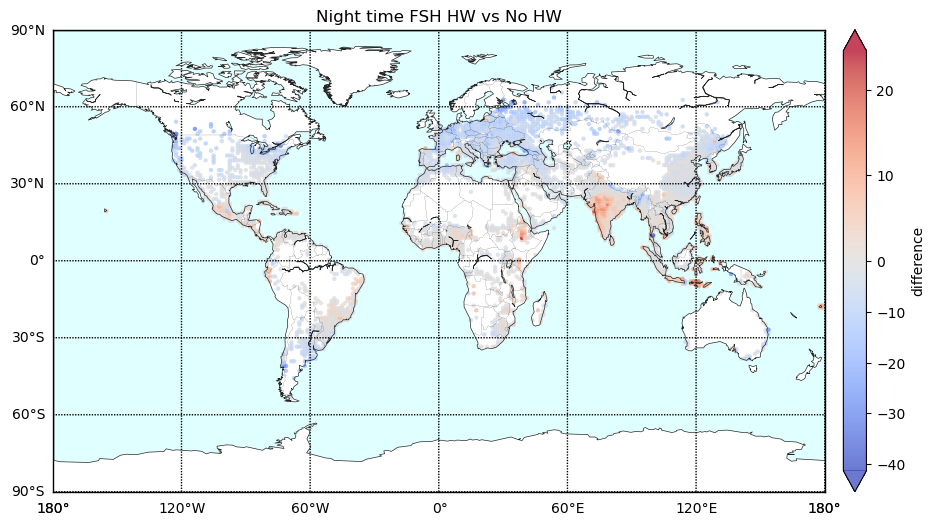

In [10]:
plot_hw_no_diff(nighttime_hw, nighttime_no_hw, 'Night time FSH HW vs No HW', 'FSH')


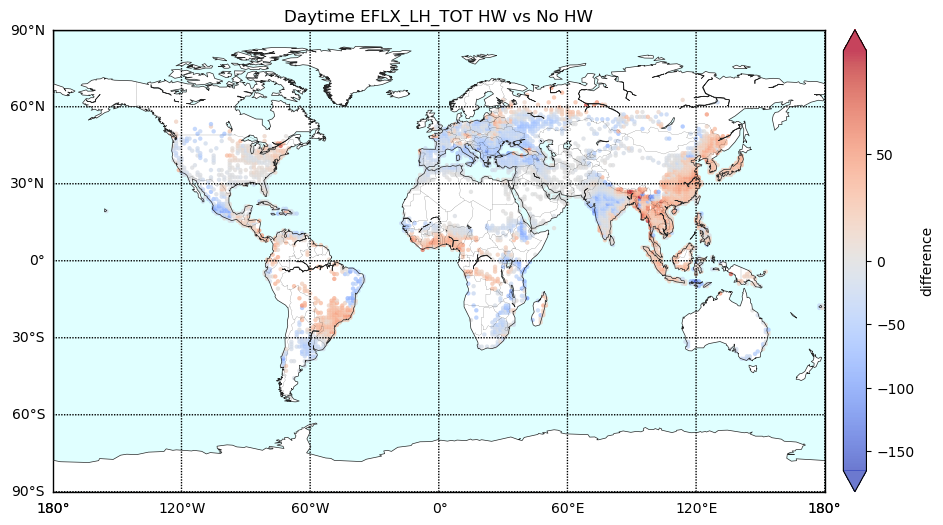

In [11]:

plot_hw_no_diff(daytime_hw, daytime_no_hw, 'Daytime EFLX_LH_TOT HW vs No HW', 'EFLX_LH_TOT')

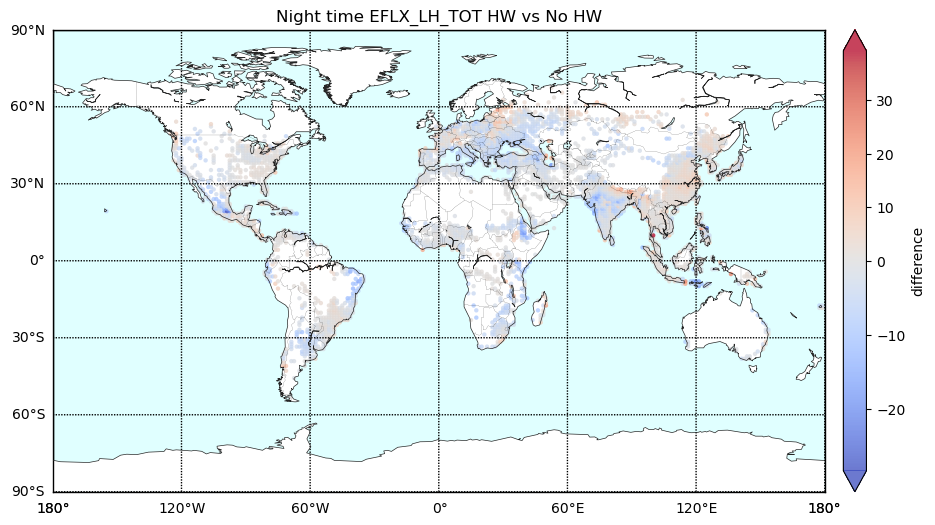

In [12]:
plot_hw_no_diff(nighttime_hw, nighttime_no_hw, 'Night time EFLX_LH_TOT HW vs No HW', 'EFLX_LH_TOT')

#  individual event anlysis

## Find negative locations

In [13]:
import pandas as pd
import numpy as np

def get_diff_locations_below_threshold(df_hw, df_no_hw, variable, threshold=0):
    """
    Compare the mean values of a specified variable between heatwave and non-heatwave conditions
    for each location_ID, and return a dataframe showing locations with differences below or equal to the threshold.
    
    Parameters:
    df_hw (pd.DataFrame): Dataframe containing heatwave data
    df_no_hw (pd.DataFrame): Dataframe containing non-heatwave data
    variable (str): Name of the variable to compare
    threshold (float): The threshold for the difference (default is 0)
    
    Returns:
    pd.DataFrame: Dataframe with location details where mean(df_hw[variable]) - mean(df_no_hw[variable]) <= threshold
    """
    
    # def normalize_longitude(lons):
    #     """
    #     Normalize longitudes to be within the range [-180, 180].
    #     """
    #     return np.where(lons > 180, lons - 360, lons)
    
    # Calculate mean values and row counts for the specified variable for each location_ID
    hw_stats = df_hw.groupby('location_ID').agg({variable: 'mean', 'time': 'count'})
    hw_stats.columns = ['hw_mean', 'hw_count']
    
    no_hw_stats = df_no_hw.groupby('location_ID').agg({variable: 'mean', 'time': 'count'})
    no_hw_stats.columns = ['no_hw_mean', 'no_hw_count']
    
    # Combine the stats
    combined_stats = hw_stats.join(no_hw_stats, how='outer')
    
    # Calculate the difference
    combined_stats['mean_diff'] = combined_stats['hw_mean'] - combined_stats['no_hw_mean']
    
    # Filter for differences below or equal to the threshold
    below_threshold = combined_stats[combined_stats['mean_diff'] <= threshold]
    
    # Get lat and lon for each location_ID
    location_info = df_hw.groupby('location_ID')[['lat', 'lon']].first().reset_index()
    
    # Create a dataframe with the results
    result_df = below_threshold.reset_index()
    
    # Add lat and lon to the result dataframe
    result_df = result_df.merge(location_info, on='location_ID', how='left')
    
    # Add normalized longitude
    result_df['normalized_lon'] = normalize_longitude(result_df['lon'])
    
    # Sort by the difference (most negative first)
    result_df = result_df.sort_values('mean_diff')
    
    # Reset the index for cleaner output
    result_df = result_df.reset_index(drop=True)
    
    return result_df


# negative_locations = get_diff_locations_below_threshold(daytime_hw, daytime_no_hw, 'FSH')
# print(negative_locations.head())

# To use a different threshold:
# small_positive_diff_locations = get_diff_locations_below_threshold(daytime_hw, daytime_no_hw, 'FSH', threshold=0.5)
# print(small_positive_diff_locations.head())

In [14]:
negative_locations = get_diff_locations_below_threshold(daytime_hw, daytime_no_hw, 'FSH')
negative_locations

,location_ID,hw_mean,hw_count,no_hw_mean,no_hw_count,mean_diff,lat,lon,normalized_lon
0,46680,-3.465298,27.0,104.399345,23985,-107.864647,62.670158,30.00,30.00
1,41179,113.093269,27.0,211.738663,23985,-98.645393,43.821991,353.75,-6.25
2,46107,56.057911,81.0,154.154419,23931,-98.096512,60.785339,33.75,33.75
3,45816,11.850881,27.0,109.321014,23985,-97.470131,59.842934,30.00,30.00
4,46400,34.133152,45.0,129.944794,23967,-95.811646,61.727749,40.00,40.00
...,...,...,...,...,...,...,...,...,...
984,29315,78.676682,162.0,78.699242,23850,-0.022560,5.183246,283.75,-76.25
985,38932,144.210526,19053.0,144.229401,4959,-0.018875,37.225132,65.00,65.00
986,38625,127.463608,19062.0,127.475212,4950,-0.011604,36.282722,41.25,41.25
987,42078,100.492378,2952.0,100.503349,21060,-0.010971,47.591621,37.50,37.50


In [15]:
plt_df = negative_locations.head(5)
plt_df


,location_ID,hw_mean,hw_count,no_hw_mean,no_hw_count,mean_diff,lat,lon,normalized_lon
0,46680,-3.465298,27.0,104.399345,23985,-107.864647,62.670158,30.00,30.00
1,41179,113.093269,27.0,211.738663,23985,-98.645393,43.821991,353.75,-6.25
2,46107,56.057911,81.0,154.154419,23931,-98.096512,60.785339,33.75,33.75
3,45816,11.850881,27.0,109.321014,23985,-97.470131,59.842934,30.00,30.00
4,46400,34.133152,45.0,129.944794,23967,-95.811646,61.727749,40.00,40.00


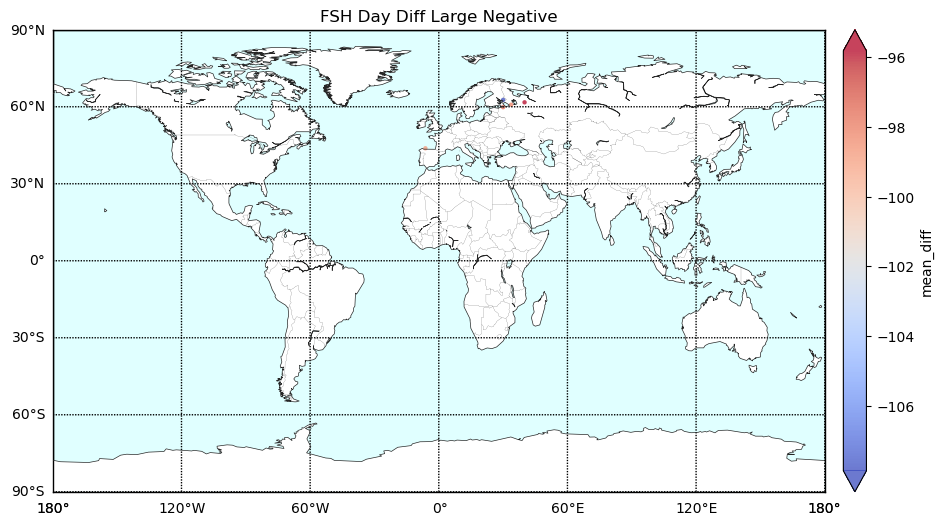

In [16]:

fig, ax = plt.subplots(figsize=(12, 6))
# fig, axs = plt.subplots(figsize=(10, 6), dpi=300)  # Correct subplot structure
draw_map_subplot(ax, 'FSH Day Diff Large Negative', plt_df, 'mean_diff')
plt.show()

##  Examine one event

In [17]:
# 41179 46107
# daytime_hw[daytime_hw['location_ID'] == 41179]
daytime_hw[daytime_hw['location_ID'] == 46107]

,time,lat,lon,Q2M,FSH,EFLX_LH_TOT,FSA,U10,hour,month,year,local_time,local_hour,location_ID,time_diff,new_event,event_ID,global_event_ID
33210317,2001-07-17 06:00:00,60.785339,33.75,0.011592,-1.166385,144.746857,274.172760,2.883680,6,7,2001,2001-07-17 08:00:00,8,46107,1.0,False,0,46107_0
33211151,2001-07-17 07:00:00,60.785339,33.75,0.011160,57.308937,166.636002,373.831757,3.319599,7,7,2001,2001-07-17 09:00:00,9,46107,1.0,False,0,46107_0
33211985,2001-07-17 08:00:00,60.785339,33.75,0.010803,123.819092,182.646149,471.044495,3.711076,8,7,2001,2001-07-17 10:00:00,10,46107,1.0,False,0,46107_0
33212819,2001-07-17 09:00:00,60.785339,33.75,0.010643,158.776382,188.822311,513.797913,3.860869,9,7,2001,2001-07-17 11:00:00,11,46107,1.0,False,0,46107_0
33213653,2001-07-17 10:00:00,60.785339,33.75,0.010526,191.496796,192.273163,550.965271,3.946891,10,7,2001,2001-07-17 12:00:00,12,46107,1.0,False,0,46107_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52780524,2010-08-10 10:00:00,60.785339,33.75,0.009785,64.464203,251.129639,405.507385,2.231479,10,8,2010,2010-08-10 12:00:00,12,46107,1.0,False,2,46107_2
52781854,2010-08-10 11:00:00,60.785339,33.75,0.009436,118.388878,163.190338,367.225311,2.366198,11,8,2010,2010-08-10 13:00:00,13,46107,1.0,False,2,46107_2
52783184,2010-08-10 12:00:00,60.785339,33.75,0.009185,114.600258,151.922104,349.927826,2.296882,12,8,2010,2010-08-10 14:00:00,14,46107,1.0,False,2,46107_2
52784514,2010-08-10 13:00:00,60.785339,33.75,0.008976,113.688164,148.860733,349.202332,2.175587,13,8,2010,2010-08-10 15:00:00,15,46107,1.0,False,2,46107_2


In [18]:
event_to_study = '46107_0'
daytime_hw[daytime_hw['global_event_ID'] == event_to_study]

,time,lat,lon,Q2M,FSH,EFLX_LH_TOT,FSA,U10,hour,month,year,local_time,local_hour,location_ID,time_diff,new_event,event_ID,global_event_ID
33210317,2001-07-17 06:00:00,60.785339,33.75,0.011592,-1.166385,144.746857,274.172760,2.883680,6,7,2001,2001-07-17 08:00:00,8,46107,1.0,False,0,46107_0
33211151,2001-07-17 07:00:00,60.785339,33.75,0.011160,57.308937,166.636002,373.831757,3.319599,7,7,2001,2001-07-17 09:00:00,9,46107,1.0,False,0,46107_0
33211985,2001-07-17 08:00:00,60.785339,33.75,0.010803,123.819092,182.646149,471.044495,3.711076,8,7,2001,2001-07-17 10:00:00,10,46107,1.0,False,0,46107_0
33212819,2001-07-17 09:00:00,60.785339,33.75,0.010643,158.776382,188.822311,513.797913,3.860869,9,7,2001,2001-07-17 11:00:00,11,46107,1.0,False,0,46107_0
33213653,2001-07-17 10:00:00,60.785339,33.75,0.010526,191.496796,192.273163,550.965271,3.946891,10,7,2001,2001-07-17 12:00:00,12,46107,1.0,False,0,46107_0
33214487,2001-07-17 11:00:00,60.785339,33.75,0.010426,208.162842,193.666840,565.772034,4.012440,11,7,2001,2001-07-17 13:00:00,13,46107,1.0,False,0,46107_0
33215321,2001-07-17 12:00:00,60.785339,33.75,0.010721,208.334167,190.487701,542.276550,3.575736,12,7,2001,2001-07-17 14:00:00,14,46107,1.0,False,0,46107_0
33216155,2001-07-17 13:00:00,60.785339,33.75,0.011568,91.510811,164.657394,348.549652,2.707418,13,7,2001,2001-07-17 15:00:00,15,46107,1.0,False,0,46107_0
33216989,2001-07-17 14:00:00,60.785339,33.75,0.012665,-16.709894,125.858994,167.093658,1.708270,14,7,2001,2001-07-17 16:00:00,16,46107,1.0,False,0,46107_0
33230382,2001-07-18 06:00:00,60.785339,33.75,0.015672,-16.355232,99.611893,171.321732,1.527175,6,7,2001,2001-07-18 08:00:00,8,46107,1.0,False,0,46107_0


## Plot Each day During the HW

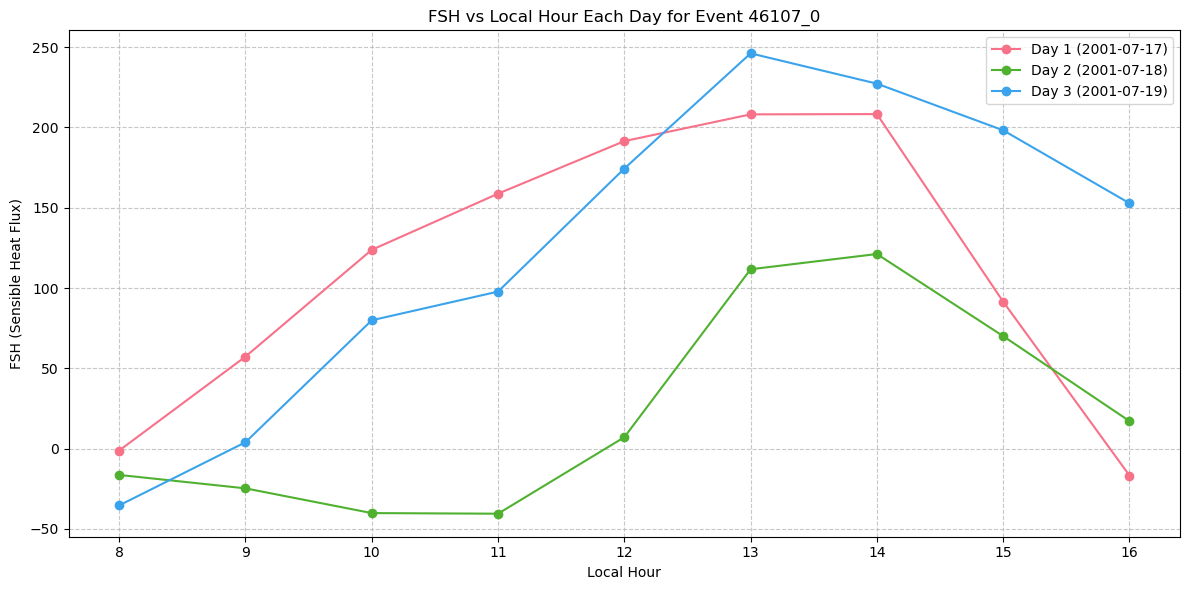

                   FSH                        local_hour    
                  mean        min         max        min max
date                                                        
2001-07-17  113.503632 -16.709894  208.334167          8  16
2001-07-18   22.846458 -40.494396  121.208290          8  16
2001-07-19  127.258575 -35.322475  246.153488          8  16


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Filter the dataframe for the specific global_event_ID
event_data = daytime_hw[daytime_hw['global_event_ID'] == event_to_study].copy()

# Convert 'time' to datetime if it's not already
event_data.loc[:, 'time'] = pd.to_datetime(event_data['time'])

# Extract the date from the 'time' column
event_data.loc[:, 'date'] = event_data['time'].dt.date

# Get unique dates
unique_dates = event_data['date'].unique()

# Create a color palette for the number of unique dates
color_palette = sns.color_palette("husl", len(unique_dates))

# Create the plot
plt.figure(figsize=(12, 6))

for i, date in enumerate(unique_dates):
    day_data = event_data[event_data['date'] == date]
    plt.plot(day_data['local_hour'], day_data['FSH'], 
             label=f'Day {i+1} ({date})', 
             color=color_palette[i], 
             marker='o')

plt.xlabel('Local Hour')
plt.ylabel('FSH (Sensible Heat Flux)')
plt.title(f'FSH vs Local Hour Each Day for Event {event_to_study}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show every hour
plt.xticks(range(int(event_data['local_hour'].min()), int(event_data['local_hour'].max())+1))

plt.tight_layout()
plt.show()

# Print some summary statistics
print(event_data.groupby('date').agg({
    'FSH': ['mean', 'min', 'max'],
    'local_hour': ['min', 'max']
}))

## plot one time series N days before and after

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_variable_around_heatwave(global_event_id, variable, df_hw, df_no_hw):
    """
    Plot a time series of a specified variable for N days before, during, and after a heatwave event.
    
    Parameters:
    global_event_id (str): The global_event_ID of the heatwave event.
    variable (str): The name of the variable to plot (e.g., 'FSH').
    df_hw (pd.DataFrame): DataFrame containing heatwave data.
    df_no_hw (pd.DataFrame): DataFrame containing non-heatwave data.
    """
    
    # Filter the dataframe for the specific global_event_ID
    event_data = df_hw[df_hw['global_event_ID'] == global_event_id]

    if event_data.empty:
        print(f"No data found for global_event_ID: {global_event_id}")
        return

    # Get the location_ID, start date, and end date of the heatwave
    location_id = event_data['location_ID'].iloc[0]
    hw_start_date = event_data['time'].min()
    hw_end_date = event_data['time'].max()

    # Calculate the number of days in the heatwave
    n_days = (hw_end_date - hw_start_date).days + 1

    # Calculate date ranges
    before_start = hw_start_date - pd.Timedelta(days=n_days)
    after_end = hw_end_date + pd.Timedelta(days=n_days)

    # Get all relevant data in one query
    all_data = pd.concat([
        df_no_hw[(df_no_hw['location_ID'] == location_id) & (df_no_hw['time'] >= before_start) & (df_no_hw['time'] < hw_start_date)],
        event_data,
        df_no_hw[(df_no_hw['location_ID'] == location_id) & (df_no_hw['time'] > hw_end_date) & (df_no_hw['time'] <= after_end)]
    ]).sort_values('time')

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot the entire time series
    ax.plot(all_data['time'], all_data[variable], marker='o', linestyle='-', markersize=4)

    # Highlight the heatwave period
    ax.axvspan(hw_start_date, hw_end_date, color='red', alpha=0.3, label='Heatwave')

    ax.set_xlabel('Time')
    ax.set_ylabel(f'{variable} ({df_hw[variable].name if variable in df_hw.columns else ""})')
    ax.set_title(f'{variable} Time Series for Location ID {location_id}\n{n_days} Days Before, During, and After Heatwave')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Summary Statistics:")
    summary = all_data.groupby(all_data['time'].dt.date).agg({
        variable: ['mean', 'min', 'max'],
        'local_hour': ['min', 'max']
    })
    print(summary)

# Example usage:
# plot_variable_around_heatwave('41179_0', 'FSH', df_hw, df_no_hw)

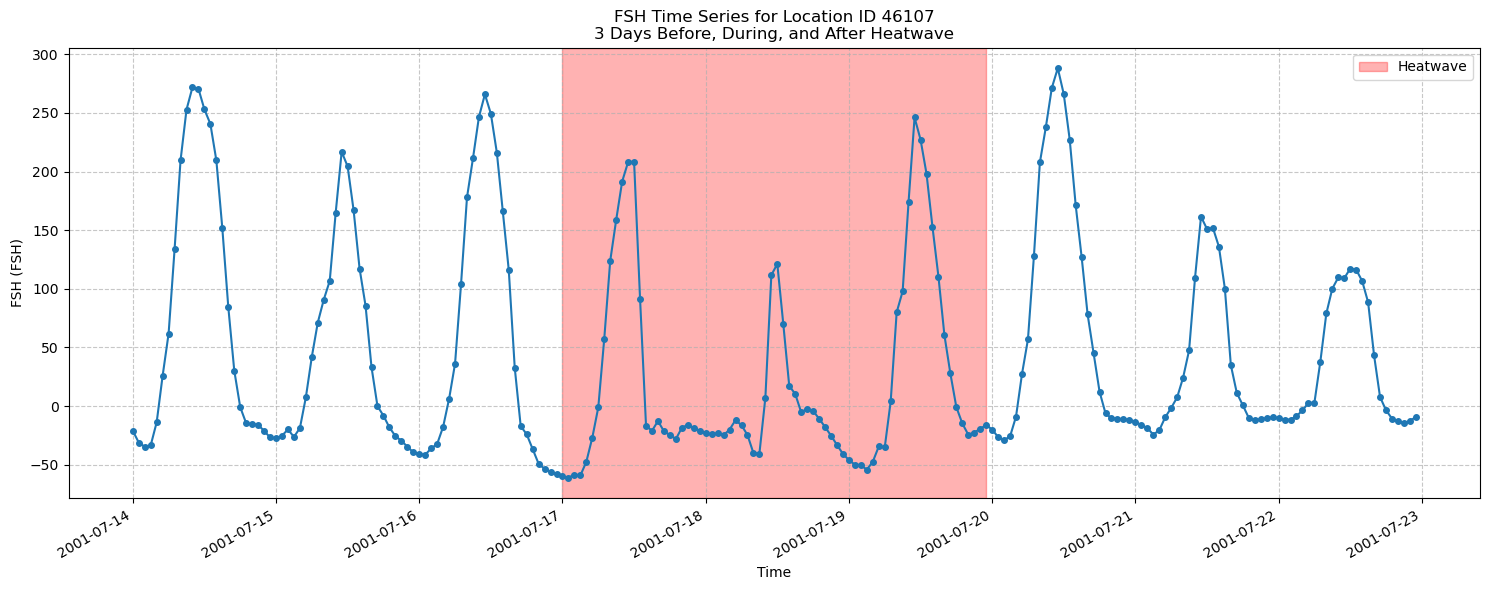

Summary Statistics:
                  FSH                        local_hour    
                 mean        min         max        min max
time                                                       
2001-07-14  81.938850 -34.694073  271.921661          0  23
2001-07-15  43.079899 -39.510952  216.879272          0  23
2001-07-16  56.843349 -58.131626  265.891144          0  23
2001-07-17  21.907812 -61.147762  208.334167          0  23
2001-07-18  -2.123343 -40.811954  121.208290          0  23
2001-07-19  40.131744 -54.215614  246.153488          0  23
2001-07-20  82.638832 -29.013058  288.144135          0  23
2001-07-21  32.413403 -24.323452  161.563034          0  23
2001-07-22  33.805172 -14.640645  117.191116          0  23


In [21]:
plot_variable_around_heatwave(event_to_study, 'FSH', df_hw, df_no_hw)

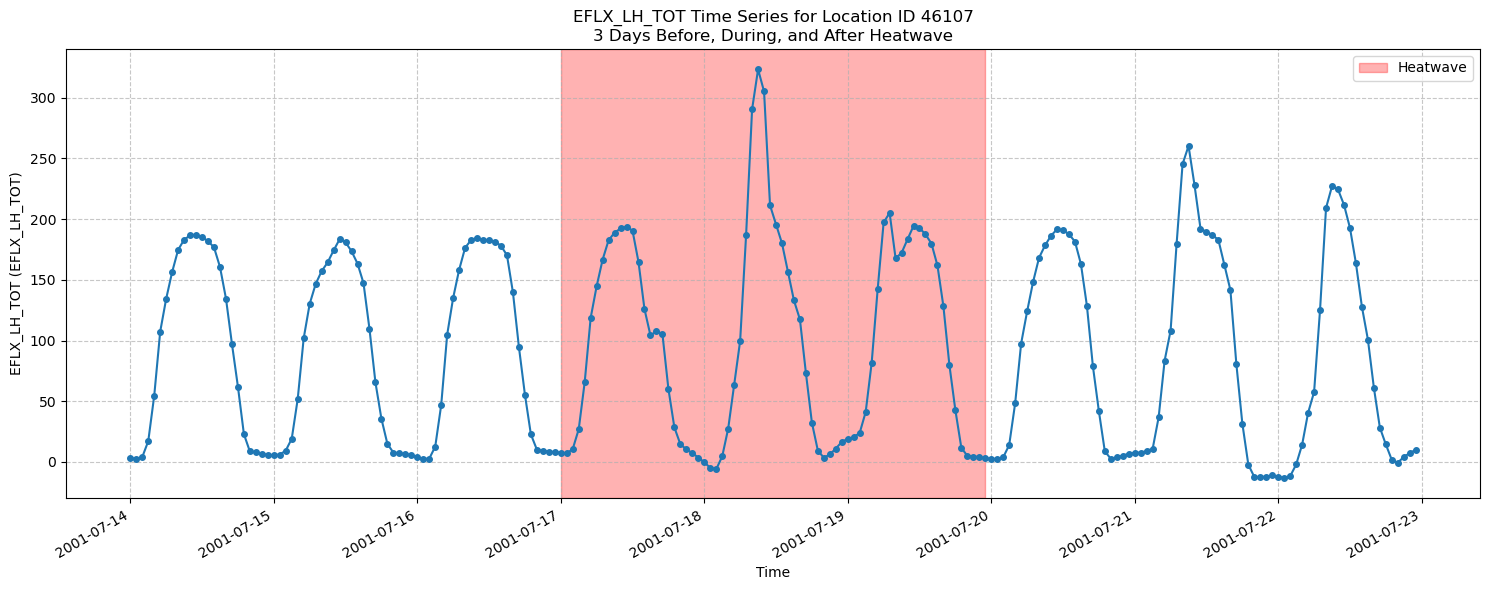

Summary Statistics:
           EFLX_LH_TOT                        local_hour    
                  mean        min         max        min max
time                                                        
2001-07-14   94.198830   2.547512  187.170898          0  23
2001-07-15   86.122353   5.536784  183.317093          0  23
2001-07-16   93.906281   2.403277  184.580002          0  23
2001-07-17   92.818665   3.600533  193.666840          0  23
2001-07-18  101.473747  -6.003904  323.334076          0  23
2001-07-19  102.019234   3.108619  205.114456          0  23
2001-07-20   90.190712   2.404703  191.590958          0  23
2001-07-21   95.538696 -12.655043  260.267731          0  23
2001-07-22   74.258247 -13.083021  227.145798          0  23


In [25]:
plot_variable_around_heatwave(event_to_study, 'EFLX_LH_TOT', df_hw, df_no_hw)    

## Plot before during after comparison

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_average_hourly_variable(global_event_id, variable, df_hw, df_no_hw, time_of_day='all'):
    """
    Plot average hourly values of a specified variable for before, during, and after a heatwave event.
    
    Parameters:
    global_event_id (str): The global_event_ID of the heatwave event.
    variable (str): The name of the variable to plot (e.g., 'FSH').
    df_hw (pd.DataFrame): DataFrame containing heatwave data.
    df_no_hw (pd.DataFrame): DataFrame containing non-heatwave data.
    time_of_day (str): 'all', 'day', or 'night' to filter data.
    """
    
    # Filter the dataframe for the specific global_event_ID
    event_data = df_hw[df_hw['global_event_ID'] == global_event_id]

    if event_data.empty:
        print(f"No data found for global_event_ID: {global_event_id}")
        return

    # Get the location_ID, start date, and end date of the heatwave
    location_id = event_data['location_ID'].iloc[0]
    hw_start_date = event_data['time'].min()
    hw_end_date = event_data['time'].max()

    # Calculate the number of days in the heatwave
    n_days = (hw_end_date - hw_start_date).days + 1

    # Calculate date ranges
    before_start = hw_start_date - pd.Timedelta(days=n_days)
    after_end = hw_end_date + pd.Timedelta(days=n_days)

    # Get all relevant data in one query
    all_data = pd.concat([
        df_no_hw[(df_no_hw['location_ID'] == location_id) & (df_no_hw['time'] >= before_start) & (df_no_hw['time'] < hw_start_date)],
        event_data,
        df_no_hw[(df_no_hw['location_ID'] == location_id) & (df_no_hw['time'] > hw_end_date) & (df_no_hw['time'] <= after_end)]
    ]).sort_values('time')

    # Add a period column to distinguish before, during, and after
    all_data['period'] = pd.cut(all_data['time'], 
                                bins=[before_start, hw_start_date, hw_end_date, after_end],
                                labels=['Before', 'During', 'After'],
                                include_lowest=True)

    # Filter by time of day if specified
    if time_of_day == 'day':
        all_data = all_data[all_data['local_hour'].between(8, 16)]
    elif time_of_day == 'night':
        all_data = all_data[(all_data['local_hour'] >= 20) | (all_data['local_hour'] <= 4)]

    # Calculate average values for each local hour and period
    avg_data = all_data.groupby(['period', 'local_hour'])[variable].mean().unstack(level=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for period in ['Before', 'During', 'After']:
        ax.plot(avg_data.index, avg_data[period], marker='o', linestyle='-', label=period)

    ax.set_xlabel('Local Hour')
    ax.set_ylabel(f'Average {variable}')
    ax.set_title(f'Average Hourly {variable} Before, During, and After Heatwave\n'
                 f'Location ID: {location_id}, Time of Day: {time_of_day.capitalize()}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set x-axis ticks to show every hour
    ax.set_xticks(range(0, 24))
    ax.set_xticklabels(range(0, 24))

    plt.tight_layout()
    plt.show()

    # Print some summary statistics
    print("Summary Statistics:")
    summary = avg_data.describe()
    print(summary)

# Example usage:
# plot_average_hourly_variable('41179_0', 'FSH', df_hw, df_no_hw, time_of_day='day')
# plot_average_hourly_variable('41179_0', 'FSH', df_hw, df_no_hw, time_of_day='night')
# plot_average_hourly_variable('41179_0', 'FSH', df_hw, df_no_hw, time_of_day='all')

/tmp/ipykernel_467755/3180664725.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = all_data.groupby(['period', 'local_hour'])[variable].mean().unstack(level=0)


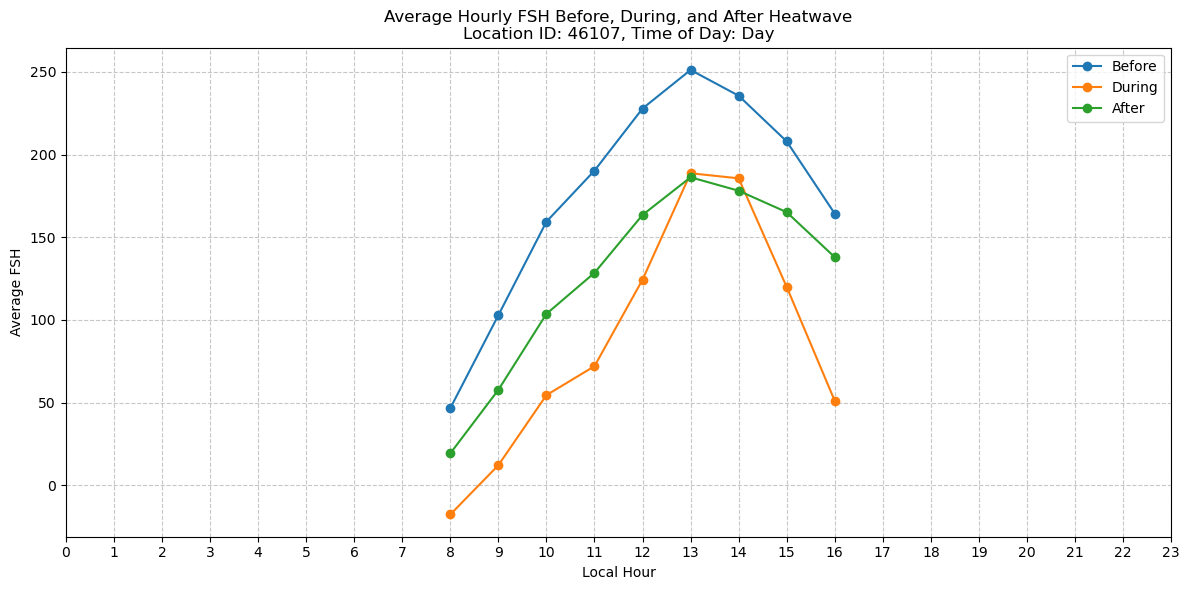

Summary Statistics:
period      Before      During       After
count     9.000000    9.000000    9.000000
mean    176.210709   87.869553  126.683502
std      66.689003   72.145821   56.962715
min      46.686340  -17.614698   19.343943
25%     159.400101   51.091629  103.669106
50%     190.257156   72.028893  137.947678
75%     227.814453  124.345924  165.146225
max     251.118240  188.676880  186.238235


In [24]:
# 46107_0
plot_average_hourly_variable(event_to_study, 'FSH', df_hw, df_no_hw, time_of_day='day')